# Global settings

In [1]:
%matplotlib inline

#%load_ext autoreload  # Autoreload has a bug : when you modify function in source code and run again, python kernel hangs :(
#%autoreload 2

import datetime as dt

import sys, importlib

from functions import *
importlib.reload(sys.modules['functions'])

import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import datetime as dt

import os
import zipfile
import urllib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np   
  
import plotly as py
import plotly.graph_objects as go
import ipywidgets as widgets

import qgrid

import glob

from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import GridSearchCV

from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import entropy

from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


import nltk
import codecs

#from nltk.corpus.reader.api import CorpusReader
#from nltk.corpus.reader.api import CategorizedCorpusReader

from nltk import pos_tag, sent_tokenize, wordpunct_tokenize

import pandas_profiling

from bs4 import BeautifulSoup

DATA_PATH = os.path.join("datasets", "stackexchange")
#DATA_PATH = os.path.join(DATA_PATH, "out")

#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults_20190101-20200620.csv")
#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults 20200301-20200620_1.csv")

DATA_PATH_FILE = os.path.join(DATA_PATH, "*.csv")
ALL_FILES_LIST = glob.glob(DATA_PATH_FILE)

ALL_FEATURES = []

MODEL_CLIENT_FEATURES = ['TotalPricePerMonth', 'DescriptionNormalized', 'HasEverCancelled', 'BoughtTopValueProduct' ]


plt.rcParams["figure.figsize"] = [16,9] # Taille par défaut des figures de matplotlib

import seaborn as sns
from seaborn import boxplot
sns.set()

#import common_functions

####### Paramètres pour sauver et restaurer les modèles :
import pickle
####### Paramètres à changer par l'utilisateur selon son besoin :

'''
RECOMPUTE_GRIDSEARCH = True  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = False # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX
                          # Grid search results are loaded with full samples (SAMPLED_DATA must be False)
'''


RECOMPUTE_GRIDSEARCH = False  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = True # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX

#GRIDSEARCH_CSV_FILE = 'grid_search_results.csv'

GRIDSEARCH_FILE_PREFIX = 'grid_search_results_'

EXECUTE_INTERMEDIATE_MODELS = True # If True: every intermediate model (which results are manually analyzed in the notebook) will be executed


# Necessary for predictors used in the notebook :
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures

### For progress bar :
from tqdm import tqdm_notebook as tqdm

# Statsmodel : 
import statsmodels.formula.api as smf

import statsmodels.api as sm
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from nltk.cluster import KMeansClusterer # NLTK algorithm will be useful for cosine distance

SAVE_API_MODEL = True # If True : API model ill be saved
API_MODEL_PICKLE_FILE = 'API_model_PJ6.pickle'


/home/francois/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Doc2vec settings

In [2]:
DOC2VEC_TRAINING_SAVE_FILE = 'doc2vec_model'
#doc2vec_fname = get_tmpfile(DOC2VEC_TRAINING_SAVE_FILE)

from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.parsing.preprocessing import remove_stopwords

import time

from gensim.test.utils import get_tmpfile

import gensim

#model.save(fname)
#model = Doc2Vec.load(fname)  # you can continue training with the loaded model!


In [3]:
ALL_FILES_LIST

['datasets/stackexchange/QueryResults 20190101-20190228_6.csv',
 'datasets/stackexchange/QueryResults 20190101-20190228_5.csv',
 'datasets/stackexchange/QueryResults 20190101-20190228_1.csv',
 'datasets/stackexchange/QueryResults 20190101-20190228_2.csv',
 'datasets/stackexchange/QueryResults 20190101-20190228_4.csv',
 'datasets/stackexchange/QueryResults 20190101-20190228_3.csv']

# Load data

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)

feats_list = ['Title', 'Body', 'Tags']

def load_data(data_path=DATA_PATH):
    csv_path = DATA_PATH_FILE
    df_list = []
    
    for f in ALL_FILES_LIST:
        print(f'Loading file {f}')
        
        df_list.append(pd.read_csv(f, sep=',', header=0, encoding='utf-8', usecols=feats_list))
        
    return pd.concat(df_list)


In [5]:
df = load_data()
df.reset_index(inplace=True, drop=True)

Loading file datasets/stackexchange/QueryResults 20190101-20190228_6.csv
Loading file datasets/stackexchange/QueryResults 20190101-20190228_5.csv
Loading file datasets/stackexchange/QueryResults 20190101-20190228_1.csv
Loading file datasets/stackexchange/QueryResults 20190101-20190228_2.csv
Loading file datasets/stackexchange/QueryResults 20190101-20190228_4.csv
Loading file datasets/stackexchange/QueryResults 20190101-20190228_3.csv


In [6]:
df

,Body,Title,Tags
0,"<p>The <a href=""https://developer.mozilla.org/...",Is there any way to inspect ::first-line and :...,<css><developer-tools>
1,<p>I have a property injected like so:</p>\n\n...,How to track changes to the injected root inst...,<vue.js>
2,<p>so I'm trying to get this cloud query funct...,Parse Cloud Code - Await and return relation q...,<javascript><parse-server><parse-cloud>
3,<p>I need help with making some IF/OR/AND stat...,complex IF statements with multiple variables ...,<excel><if-statement><excel-formula>
4,<p>What is wrong with this filter? </p>\n\n<pr...,Active Directory userAccountcontrol multiple v...,<filter><active-directory>
...,...,...,...
299995,<p>I need to input filed value in application ...,Xpath to match case sensitive of multiple strings,<selenium><xpath><xpath-1.0>
299996,<p>I'm trying to do a basic test using Seleniu...,Using Selenium Grid to run Safari on MacOS Mojave,<java><selenium><selenium-webdriver><selenium-...
299997,"<p>Briefly, I'm parsing HTTP headers, received...","c, trimming strings, and wide characters",<c><trim><widechar><widestring>
299998,<p>Context: I'm a student who just finished an...,Operating systems vs. database management systems,<database><operating-system>


## Drop NA

In [7]:
df.dropna(subset=['Body'], axis=0, inplace=True)
df.dropna(subset=['Tags'], axis=0, inplace=True)

In [8]:
df.shape

(299144, 3)

# Encode labels (strip < and >, then 1 hot encode)

In [9]:
# Converting tags from <tag 1><tag2><tag3> to tag1 tag2 tag3
df.loc[:, 'Tags'] = df['Tags'].str.replace('<', '') 
df.loc[:, 'Tags'] = df.loc[:, 'Tags'].str.replace('>', ' ') 
df.loc[:, 'Tags'] = df.loc[:, 'Tags'].str.rstrip()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299144 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Body    299144 non-null  object
 1   Title   299144 non-null  object
 2   Tags    299144 non-null  object
dtypes: object(3)
memory usage: 9.1+ MB


In [11]:
#df_train.dropna(subset=['Tags'], axis=0, inplace=True)  # Can be removed later  (NA already dropped on df first place)
#df_test.dropna(subset=['Tags'], axis=0, inplace=True)  # Can be removed later  (NA already dropped on df first place)

In [12]:
bowencoder = BowEncoder()

In [13]:
bowencoder.fit(df, categorical_features_totransform=['Tags'])

BowEncoder(min_df=0.001)

In [14]:
df = bowencoder.transform(df)

In [15]:
df[['Body', 'Tags', 'Tags_javascript', 'Tags_jquery', 'Tags_python', 'Tags_html', 'Tags_java', 'Tags_docker', 'Tags_android', 'Tags_cordova']]

,Body,Tags,Tags_javascript,Tags_jquery,Tags_python,Tags_html,Tags_java,Tags_docker,Tags_android,Tags_cordova
0,"<p>The <a href=""https://developer.mozilla.org/...",css developer-tools,0,0,0,0,0,0,0,0
1,<p>I have a property injected like so:</p>\n\n...,vue.js,0,0,0,0,0,0,0,0
2,<p>so I'm trying to get this cloud query funct...,javascript parse-server parse-cloud,1,0,0,0,0,0,0,0
3,<p>I need help with making some IF/OR/AND stat...,excel if-statement excel-formula,0,0,0,0,0,0,0,0
4,<p>What is wrong with this filter? </p>\n\n<pr...,filter active-directory,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
299139,<p>I need to input filed value in application ...,selenium xpath xpath-1.0,0,0,0,0,0,0,0,0
299140,<p>I'm trying to do a basic test using Seleniu...,java selenium selenium-webdriver selenium-grid...,0,0,0,0,1,0,0,0
299141,"<p>Briefly, I'm parsing HTTP headers, received...",c trim widechar widestring,0,0,0,0,0,0,0,0
299142,<p>Context: I'm a student who just finished an...,database operating-system,0,0,0,0,0,0,0,0


In [16]:
filter_col_labels = [col for col in df if col.startswith('Tags')]

In [17]:
df_labels = df[filter_col_labels].copy(deep=True)

In [18]:
df_labels.drop(columns=['Tags'], inplace=True)

In [19]:
df_labels

,Tags_.htaccess,Tags_.net,Tags_.net-core,Tags_ajax,Tags_algorithm,Tags_amazon-ec2,Tags_amazon-s3,Tags_amazon-web-services,Tags_anaconda,Tags_android,Tags_android-fragments,Tags_android-layout,Tags_android-recyclerview,Tags_android-studio,Tags_angular,Tags_angular-material,Tags_angular6,Tags_angular7,Tags_angularjs,Tags_animation,Tags_ansible,Tags_apache,Tags_apache-kafka,Tags_apache-spark,Tags_apache-spark-sql,Tags_api,Tags_arraylist,Tags_arrays,Tags_asp.net,Tags_asp.net-core,Tags_asp.net-core-mvc,Tags_asp.net-mvc,Tags_asp.net-web-api,Tags_assembly,Tags_async-await,Tags_asynchronous,Tags_authentication,Tags_automation,Tags_awk,Tags_aws-lambda,Tags_axios,Tags_azure,Tags_azure-active-directory,Tags_azure-devops,Tags_azure-functions,Tags_bash,Tags_batch-file,Tags_beautifulsoup,Tags_bootstrap-4,Tags_button,Tags_c,Tags_c#,Tags_c++,Tags_c++11,Tags_c++17,Tags_caching,Tags_canvas,Tags_class,Tags_cmake,Tags_cmd,Tags_codeigniter,Tags_cordova,Tags_css,Tags_csv,Tags_curl,Tags_d3.js,Tags_dart,Tags_data-structures,Tags_database,Tags_dataframe,Tags_datatable,Tags_datatables,Tags_date,Tags_datetime,Tags_debugging,Tags_deep-learning,Tags_delphi,Tags_dependency-injection,Tags_design-patterns,Tags_dictionary,Tags_django,Tags_django-forms,Tags_django-models,Tags_django-rest-framework,Tags_django-views,Tags_docker,Tags_docker-compose,Tags_dom,Tags_dplyr,Tags_eclipse,Tags_ecmascript-6,Tags_elasticsearch,Tags_electron,Tags_eloquent,Tags_email,Tags_encryption,Tags_entity-framework,Tags_entity-framework-core,Tags_excel,Tags_excel-formula,Tags_exception,Tags_expo,Tags_express,Tags_facebook,Tags_ffmpeg,Tags_file,Tags_filter,Tags_firebase,Tags_firebase-authentication,Tags_firebase-realtime-database,Tags_flask,Tags_flexbox,Tags_flutter,Tags_for-loop,Tags_forms,Tags_function,Tags_gcc,Tags_generics,Tags_ggplot2,Tags_git,Tags_github,Tags_gitlab,Tags_go,Tags_google-api,Tags_google-app-engine,Tags_google-apps-script,Tags_google-bigquery,Tags_google-chrome,Tags_google-chrome-extension,Tags_google-cloud-firestore,Tags_google-cloud-functions,Tags_google-cloud-platform,Tags_google-maps,Tags_google-sheets,Tags_gradle,Tags_graphql,Tags_groovy,Tags_group-by,Tags_hadoop,Tags_haskell,Tags_heroku,Tags_hibernate,Tags_highcharts,Tags_hive,Tags_html,Tags_http,Tags_https,Tags_if-statement,Tags_iis,Tags_image,Tags_image-processing,Tags_import,Tags_indexing,Tags_inheritance,Tags_input,Tags_intellij-idea,Tags_ionic-framework,Tags_ionic3,Tags_ionic4,Tags_ios,Tags_java,Tags_java-8,Tags_java-stream,Tags_javafx,Tags_javascript,Tags_jdbc,Tags_jenkins,Tags_jenkins-pipeline,Tags_jestjs,Tags_jmeter,Tags_join,Tags_jpa,Tags_jquery,Tags_json,Tags_junit,Tags_jupyter-notebook,Tags_jwt,Tags_keras,Tags_kotlin,Tags_kubernetes,Tags_lambda,Tags_laravel,Tags_laravel-5,Tags_laravel-5.7,Tags_linq,Tags_linux,Tags_list,Tags_listview,Tags_logging,Tags_loops,Tags_machine-learning,Tags_macos,Tags_mariadb,Tags_math,Tags_matlab,Tags_matplotlib,Tags_matrix,Tags_maven,Tags_memory,Tags_merge,Tags_model-view-controller,Tags_mongodb,Tags_mongoose,Tags_ms-access,Tags_multidimensional-array,Tags_multithreading,Tags_mvvm,Tags_mysql,Tags_mysqli,Tags_nativescript,Tags_neo4j,Tags_networking,Tags_neural-network,Tags_nginx,Tags_nlp,Tags_node.js,Tags_npm,Tags_numpy,Tags_oauth-2.0,Tags_object,Tags_objective-c,Tags_oop,Tags_opencv,Tags_opengl,Tags_optimization,Tags_oracle,Tags_outlook,Tags_pandas,Tags_pandas-groupby,Tags_parsing,Tags_pdf,Tags_performance,Tags_perl,Tags_php,Tags_pip,Tags_plot,Tags_plsql,Tags_pointers,Tags_post,Tags_postgresql,Tags_powerbi,Tags_powershell,Tags_promise,Tags_pycharm,Tags_pygame,Tags_pyqt5,Tags_pyspark,Tags_python,Tags_python-2.7,Tags_python-3.x,Tags_python-requests,Tags_pytorch,Tags_qt,Tags_r,Tags_random,Tags_razor,Tags_react-native,Tags_react-redux,Tags_react-router,Tags_reactjs,Tags_recursion,Tags_redis,Tags_redux,Tags_regex,Tags_rest,Tags_ruby,Tags_ruby-on-rails,Tags_ruby-on-rails-5,Tags_rust,Tags_rxjs,Tags_sass,Tags_scala,Tags_scikit-learn,Tags_scipy,Tags_scrapy,Tags_search,Tags_securit

In [20]:
df.drop(columns=filter_col_labels, inplace=True)

In [21]:
df_labels.shape

(299144, 357)

# Split training set, test set, and split labels

In [22]:
df, df_train, df_test, df_train_labels, df_test_labels = custom_train_test_split_with_labels(df, df_labels, None)

In [23]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train_labels.reset_index(drop=True, inplace=True)
df_test_labels.reset_index(drop=True, inplace=True)

In [24]:
df_train

,index,Body,Title
0,38627,<p>Here is my code:</p>\n\n<pre><code> def ...,why is my ping command getting a usage error?
1,287251,<p>Gradle sync failed when the firebase cloud ...,Gradle project sync failed. Basic functionalit...
2,55807,"<p>I have a panda dataframe with many rows, I ...",Passing second argument to function in pool.map
3,21833,"<p>I am doing a file upload page , that will r...",move_uploaded_file() failed to open stream and...
4,174456,<p>I have this piece of code located inside of...,Using Router in an interceptor located in inde...
...,...,...,...
269224,120265,<p>Can we get keys of a <code>JSON</code> in t...,Get keys of object in order?
269225,259932,<p>I am using a rich text editor to type forma...,Passing HTML string to my controller action me...
269226,132354,<h2>Problem</h2>\n<p>How do I pass a value fro...,Setting and using an environment variable in m...
269227,147325,<p>I have a C programming exam a few days late...,"Bitwise Operators in C, int 021 vs 21?"


In [25]:
df_test

,index,Body,Title
0,141549,<p>I am unable to figure out how to get to my ...,How to load website and debug node application?
1,227939,<p>Authenticate is okay when the user info is ...,How to fix unwanted exceptions from JSON.parse...
2,263961,"<pre><code>dict = {'a':['b1','b2', 'b3'], 'b':...",Library like os.path.commonprefix but returns ...
3,199225,<p>Suppose I randomly generate a list. </p>\n\...,Counting the number of times a variable has ch...
4,280078,<p>I have the following Angular template <a hr...,Angular parameter seems to have no effect in S...
...,...,...,...
29910,47530,<p>I would like to do some development with Py...,Python version for the development
29911,192379,<p>I am using micronaut 1.0.3 with Java8. I am...,Micronaut HttpClient: Correct way to handle sp...
29912,216130,<p>we are making an VR experience and we have ...,Unity VR can't see textures on build
29913,185830,<p>I am trying to use urllib to fill out a for...,"sending data, but result shows a GET request i..."


In [26]:
df_train_labels

,Tags_.htaccess,Tags_.net,Tags_.net-core,Tags_ajax,Tags_algorithm,Tags_amazon-ec2,Tags_amazon-s3,Tags_amazon-web-services,Tags_anaconda,Tags_android,Tags_android-fragments,Tags_android-layout,Tags_android-recyclerview,Tags_android-studio,Tags_angular,Tags_angular-material,Tags_angular6,Tags_angular7,Tags_angularjs,Tags_animation,Tags_ansible,Tags_apache,Tags_apache-kafka,Tags_apache-spark,Tags_apache-spark-sql,Tags_api,Tags_arraylist,Tags_arrays,Tags_asp.net,Tags_asp.net-core,Tags_asp.net-core-mvc,Tags_asp.net-mvc,Tags_asp.net-web-api,Tags_assembly,Tags_async-await,Tags_asynchronous,Tags_authentication,Tags_automation,Tags_awk,Tags_aws-lambda,Tags_axios,Tags_azure,Tags_azure-active-directory,Tags_azure-devops,Tags_azure-functions,Tags_bash,Tags_batch-file,Tags_beautifulsoup,Tags_bootstrap-4,Tags_button,Tags_c,Tags_c#,Tags_c++,Tags_c++11,Tags_c++17,Tags_caching,Tags_canvas,Tags_class,Tags_cmake,Tags_cmd,Tags_codeigniter,Tags_cordova,Tags_css,Tags_csv,Tags_curl,Tags_d3.js,Tags_dart,Tags_data-structures,Tags_database,Tags_dataframe,Tags_datatable,Tags_datatables,Tags_date,Tags_datetime,Tags_debugging,Tags_deep-learning,Tags_delphi,Tags_dependency-injection,Tags_design-patterns,Tags_dictionary,Tags_django,Tags_django-forms,Tags_django-models,Tags_django-rest-framework,Tags_django-views,Tags_docker,Tags_docker-compose,Tags_dom,Tags_dplyr,Tags_eclipse,Tags_ecmascript-6,Tags_elasticsearch,Tags_electron,Tags_eloquent,Tags_email,Tags_encryption,Tags_entity-framework,Tags_entity-framework-core,Tags_excel,Tags_excel-formula,Tags_exception,Tags_expo,Tags_express,Tags_facebook,Tags_ffmpeg,Tags_file,Tags_filter,Tags_firebase,Tags_firebase-authentication,Tags_firebase-realtime-database,Tags_flask,Tags_flexbox,Tags_flutter,Tags_for-loop,Tags_forms,Tags_function,Tags_gcc,Tags_generics,Tags_ggplot2,Tags_git,Tags_github,Tags_gitlab,Tags_go,Tags_google-api,Tags_google-app-engine,Tags_google-apps-script,Tags_google-bigquery,Tags_google-chrome,Tags_google-chrome-extension,Tags_google-cloud-firestore,Tags_google-cloud-functions,Tags_google-cloud-platform,Tags_google-maps,Tags_google-sheets,Tags_gradle,Tags_graphql,Tags_groovy,Tags_group-by,Tags_hadoop,Tags_haskell,Tags_heroku,Tags_hibernate,Tags_highcharts,Tags_hive,Tags_html,Tags_http,Tags_https,Tags_if-statement,Tags_iis,Tags_image,Tags_image-processing,Tags_import,Tags_indexing,Tags_inheritance,Tags_input,Tags_intellij-idea,Tags_ionic-framework,Tags_ionic3,Tags_ionic4,Tags_ios,Tags_java,Tags_java-8,Tags_java-stream,Tags_javafx,Tags_javascript,Tags_jdbc,Tags_jenkins,Tags_jenkins-pipeline,Tags_jestjs,Tags_jmeter,Tags_join,Tags_jpa,Tags_jquery,Tags_json,Tags_junit,Tags_jupyter-notebook,Tags_jwt,Tags_keras,Tags_kotlin,Tags_kubernetes,Tags_lambda,Tags_laravel,Tags_laravel-5,Tags_laravel-5.7,Tags_linq,Tags_linux,Tags_list,Tags_listview,Tags_logging,Tags_loops,Tags_machine-learning,Tags_macos,Tags_mariadb,Tags_math,Tags_matlab,Tags_matplotlib,Tags_matrix,Tags_maven,Tags_memory,Tags_merge,Tags_model-view-controller,Tags_mongodb,Tags_mongoose,Tags_ms-access,Tags_multidimensional-array,Tags_multithreading,Tags_mvvm,Tags_mysql,Tags_mysqli,Tags_nativescript,Tags_neo4j,Tags_networking,Tags_neural-network,Tags_nginx,Tags_nlp,Tags_node.js,Tags_npm,Tags_numpy,Tags_oauth-2.0,Tags_object,Tags_objective-c,Tags_oop,Tags_opencv,Tags_opengl,Tags_optimization,Tags_oracle,Tags_outlook,Tags_pandas,Tags_pandas-groupby,Tags_parsing,Tags_pdf,Tags_performance,Tags_perl,Tags_php,Tags_pip,Tags_plot,Tags_plsql,Tags_pointers,Tags_post,Tags_postgresql,Tags_powerbi,Tags_powershell,Tags_promise,Tags_pycharm,Tags_pygame,Tags_pyqt5,Tags_pyspark,Tags_python,Tags_python-2.7,Tags_python-3.x,Tags_python-requests,Tags_pytorch,Tags_qt,Tags_r,Tags_random,Tags_razor,Tags_react-native,Tags_react-redux,Tags_react-router,Tags_reactjs,Tags_recursion,Tags_redis,Tags_redux,Tags_regex,Tags_rest,Tags_ruby,Tags_ruby-on-rails,Tags_ruby-on-rails-5,Tags_rust,Tags_rxjs,Tags_sass,Tags_scala,Tags_scikit-learn,Tags_scipy,Tags_scrapy,Tags_search,Tags_securit

In [27]:
df_test_labels

,Tags_.htaccess,Tags_.net,Tags_.net-core,Tags_ajax,Tags_algorithm,Tags_amazon-ec2,Tags_amazon-s3,Tags_amazon-web-services,Tags_anaconda,Tags_android,Tags_android-fragments,Tags_android-layout,Tags_android-recyclerview,Tags_android-studio,Tags_angular,Tags_angular-material,Tags_angular6,Tags_angular7,Tags_angularjs,Tags_animation,Tags_ansible,Tags_apache,Tags_apache-kafka,Tags_apache-spark,Tags_apache-spark-sql,Tags_api,Tags_arraylist,Tags_arrays,Tags_asp.net,Tags_asp.net-core,Tags_asp.net-core-mvc,Tags_asp.net-mvc,Tags_asp.net-web-api,Tags_assembly,Tags_async-await,Tags_asynchronous,Tags_authentication,Tags_automation,Tags_awk,Tags_aws-lambda,Tags_axios,Tags_azure,Tags_azure-active-directory,Tags_azure-devops,Tags_azure-functions,Tags_bash,Tags_batch-file,Tags_beautifulsoup,Tags_bootstrap-4,Tags_button,Tags_c,Tags_c#,Tags_c++,Tags_c++11,Tags_c++17,Tags_caching,Tags_canvas,Tags_class,Tags_cmake,Tags_cmd,Tags_codeigniter,Tags_cordova,Tags_css,Tags_csv,Tags_curl,Tags_d3.js,Tags_dart,Tags_data-structures,Tags_database,Tags_dataframe,Tags_datatable,Tags_datatables,Tags_date,Tags_datetime,Tags_debugging,Tags_deep-learning,Tags_delphi,Tags_dependency-injection,Tags_design-patterns,Tags_dictionary,Tags_django,Tags_django-forms,Tags_django-models,Tags_django-rest-framework,Tags_django-views,Tags_docker,Tags_docker-compose,Tags_dom,Tags_dplyr,Tags_eclipse,Tags_ecmascript-6,Tags_elasticsearch,Tags_electron,Tags_eloquent,Tags_email,Tags_encryption,Tags_entity-framework,Tags_entity-framework-core,Tags_excel,Tags_excel-formula,Tags_exception,Tags_expo,Tags_express,Tags_facebook,Tags_ffmpeg,Tags_file,Tags_filter,Tags_firebase,Tags_firebase-authentication,Tags_firebase-realtime-database,Tags_flask,Tags_flexbox,Tags_flutter,Tags_for-loop,Tags_forms,Tags_function,Tags_gcc,Tags_generics,Tags_ggplot2,Tags_git,Tags_github,Tags_gitlab,Tags_go,Tags_google-api,Tags_google-app-engine,Tags_google-apps-script,Tags_google-bigquery,Tags_google-chrome,Tags_google-chrome-extension,Tags_google-cloud-firestore,Tags_google-cloud-functions,Tags_google-cloud-platform,Tags_google-maps,Tags_google-sheets,Tags_gradle,Tags_graphql,Tags_groovy,Tags_group-by,Tags_hadoop,Tags_haskell,Tags_heroku,Tags_hibernate,Tags_highcharts,Tags_hive,Tags_html,Tags_http,Tags_https,Tags_if-statement,Tags_iis,Tags_image,Tags_image-processing,Tags_import,Tags_indexing,Tags_inheritance,Tags_input,Tags_intellij-idea,Tags_ionic-framework,Tags_ionic3,Tags_ionic4,Tags_ios,Tags_java,Tags_java-8,Tags_java-stream,Tags_javafx,Tags_javascript,Tags_jdbc,Tags_jenkins,Tags_jenkins-pipeline,Tags_jestjs,Tags_jmeter,Tags_join,Tags_jpa,Tags_jquery,Tags_json,Tags_junit,Tags_jupyter-notebook,Tags_jwt,Tags_keras,Tags_kotlin,Tags_kubernetes,Tags_lambda,Tags_laravel,Tags_laravel-5,Tags_laravel-5.7,Tags_linq,Tags_linux,Tags_list,Tags_listview,Tags_logging,Tags_loops,Tags_machine-learning,Tags_macos,Tags_mariadb,Tags_math,Tags_matlab,Tags_matplotlib,Tags_matrix,Tags_maven,Tags_memory,Tags_merge,Tags_model-view-controller,Tags_mongodb,Tags_mongoose,Tags_ms-access,Tags_multidimensional-array,Tags_multithreading,Tags_mvvm,Tags_mysql,Tags_mysqli,Tags_nativescript,Tags_neo4j,Tags_networking,Tags_neural-network,Tags_nginx,Tags_nlp,Tags_node.js,Tags_npm,Tags_numpy,Tags_oauth-2.0,Tags_object,Tags_objective-c,Tags_oop,Tags_opencv,Tags_opengl,Tags_optimization,Tags_oracle,Tags_outlook,Tags_pandas,Tags_pandas-groupby,Tags_parsing,Tags_pdf,Tags_performance,Tags_perl,Tags_php,Tags_pip,Tags_plot,Tags_plsql,Tags_pointers,Tags_post,Tags_postgresql,Tags_powerbi,Tags_powershell,Tags_promise,Tags_pycharm,Tags_pygame,Tags_pyqt5,Tags_pyspark,Tags_python,Tags_python-2.7,Tags_python-3.x,Tags_python-requests,Tags_pytorch,Tags_qt,Tags_r,Tags_random,Tags_razor,Tags_react-native,Tags_react-redux,Tags_react-router,Tags_reactjs,Tags_recursion,Tags_redis,Tags_redux,Tags_regex,Tags_rest,Tags_ruby,Tags_ruby-on-rails,Tags_ruby-on-rails-5,Tags_rust,Tags_rxjs,Tags_sass,Tags_scala,Tags_scikit-learn,Tags_scipy,Tags_scrapy,Tags_search,Tags_securit

In [28]:
df_train_ori = df_train.copy(deep=True)
df_test_ori = df_test.copy(deep=True)

In [29]:
df_train.shape

(269229, 3)

In [30]:
df_test.shape

(29915, 3)

In [31]:
df_train_labels.shape

(269229, 357)

In [32]:
df_test_labels.shape

(29915, 357)

# Prepare text data (remove html in Body, and regroup Body + title)

In [33]:
df_train = df_train_ori
df_test = df_test_ori

In [34]:
dataprep = PrepareTextData()

In [35]:
df_train = dataprep.fit_transform(df_train)

In [36]:
df_test = dataprep.transform(df_test)

In [37]:
df_train

,all_text
0,why is my ping command getting a usage error?....
1,Gradle project sync failed. Basic functionalit...
2,Passing second argument to function in pool.ma...
3,move_uploaded_file() failed to open stream and...
4,Using Router in an interceptor located in inde...
...,...
269224,Get keys of object in order?. Can we get keys ...
269225,Passing HTML string to my controller action me...
269226,Setting and using an environment variable in m...
269227,"Bitwise Operators in C, int 021 vs 21?. I have..."


In [38]:
df_test

,all_text
0,How to load website and debug node application...
1,How to fix unwanted exceptions from JSON.parse...
2,Library like os.path.commonprefix but returns ...
3,Counting the number of times a variable has ch...
4,Angular parameter seems to have no effect in S...
...,...
29910,Python version for the development. I would li...
29911,Micronaut HttpClient: Correct way to handle sp...
29912,Unity VR can't see textures on build. we are m...
29913,"sending data, but result shows a GET request i..."


# Doc2Vec training (launch only the 1st time)

In [67]:
cnt_label = 0
InputDocs = []
for document in df_train['all_text']:  # TO DO : relaunch this training with df_train
    #InputDocs.append(TaggedDocument(document,[cnt_label]))
    
    doc_transformed = remove_stopwords(document)
    doc_toappend = gensim.utils.simple_preprocess(doc_transformed)
    
    InputDocs.append(TaggedDocument(doc_toappend,[cnt_label]))    
    cnt_label += 1

In [68]:
InputDocs

[TaggedDocument(words=['ping', 'command', 'getting', 'usage', 'error', 'here', 'code', 'def', 'ping_host', 'self', 'hostname', 'ping_cmd', 'usr', 'bin', 'ping', 'count', 'timeout', 'cmd', 'ping_cmd', 'count', 'timeout', 'hostname', 'output', 'error', 'subprocess', 'popen', 'cmd', 'stdout', 'subprocess', 'pipe', 'stderr', 'subprocess', 'pipe', 'shell', 'true', 'communicate', 'print', 'join', 'cmd', 'print', 'output', 'error', 'when', 'run', 'output', 'usr', 'bin', 'ping', 'tools', 'dev', 'example', 'com', 'usage', 'ping', 'count', 'interval', 'interface', 'mark', 'pmtudisc_option', 'preload', 'pattern', 'tos', 'packetsize', 'sndbuf', 'ttl', 'deadline', 'timeout', 'hop', 'destination', 'usage', 'ping', 'count', 'interval', 'interface', 'preload', 'mark', 'pmtudisc_option', 'nodeinfo_option', 'pattern', 'tclass', 'packetsize', 'sndbuf', 'ttl', 'deadline', 'timeout', 'destination', 'assume', 'wrong', 'argument', 'cmd', 'passing', 'popen', 'don', 'know', 'what', 'if', 'cut', 'paste', 'usr',

In [69]:
start = time.time()
model_doc2vec = Doc2Vec(InputDocs, vector_size=200, window=5, min_count=5, workers=4)  # All input docs loaded in memory
end = time.time()

print('Durée doc2vec training: ' + str(end - start) + ' secondes')    

Durée doc2vec training: 398.01753854751587 secondes


In [70]:
#model_doc2vec.save(doc2vec_fname)
model_doc2vec.save(DOC2VEC_TRAINING_SAVE_FILE)

In [71]:
TaggedDocument(gensim.utils.simple_preprocess(df_train.iloc[0]['all_text']), [0])

TaggedDocument(words=['why', 'is', 'my', 'ping', 'command', 'getting', 'usage', 'error', 'here', 'is', 'my', 'code', 'def', 'ping_host', 'self', 'hostname', 'ping_cmd', 'usr', 'bin', 'ping', 'count', 'timeout', 'cmd', 'ping_cmd', 'count', 'timeout', 'hostname', 'output', 'error', 'subprocess', 'popen', 'cmd', 'stdout', 'subprocess', 'pipe', 'stderr', 'subprocess', 'pipe', 'shell', 'true', 'communicate', 'print', 'join', 'cmd', 'print', 'output', 'error', 'when', 'run', 'it', 'get', 'this', 'output', 'usr', 'bin', 'ping', 'tools', 'dev', 'example', 'com', 'usage', 'ping', 'count', 'interval', 'interface', 'mark', 'pmtudisc_option', 'preload', 'pattern', 'tos', 'packetsize', 'sndbuf', 'ttl', 'deadline', 'timeout', 'hop', 'destination', 'usage', 'ping', 'count', 'interval', 'interface', 'preload', 'mark', 'pmtudisc_option', 'nodeinfo_option', 'pattern', 'tclass', 'packetsize', 'sndbuf', 'ttl', 'deadline', 'timeout', 'destination', 'assume', 'am', 'doing', 'something', 'wrong', 'with', 'th

In [72]:
gensim.utils.simple_preprocess("Hello this is a new text")

['hello', 'this', 'is', 'new', 'text']

In [73]:
[model_doc2vec.infer_vector(gensim.utils.simple_preprocess(text)) for text in ['hello this is', 'second text']]

[array([ 2.09137686e-02, -2.18940945e-03, -1.14140874e-02, -1.19561749e-02,
        -1.47045255e-02, -3.04870494e-02, -3.55851860e-03, -9.83100617e-04,
         3.51592638e-02, -3.67193632e-02,  1.71000685e-03, -2.77323201e-02,
         6.46899315e-03, -9.48780309e-03,  6.24315767e-03,  4.14009346e-03,
        -4.19779727e-03,  9.38487519e-03,  1.15454039e-02, -2.60294098e-02,
        -3.43055241e-02,  2.09935773e-02, -9.65382345e-03,  4.04058862e-03,
         1.13382665e-02,  1.06888246e-02, -1.92741621e-02, -2.02421267e-02,
         1.04010869e-02,  3.09562236e-02, -1.90024003e-02, -2.03841217e-02,
         4.04751394e-03, -1.59872733e-02,  3.55172646e-03, -5.51851131e-02,
         1.64682362e-02, -1.89960748e-02,  1.68417615e-03,  7.66108138e-03,
         2.49439757e-03, -7.54581764e-03, -8.38271063e-03,  2.01061945e-02,
        -1.95211396e-02, -8.72576144e-03, -9.51920578e-04,  4.85786796e-03,
         7.32369674e-03, -9.52586625e-03, -1.53034301e-02, -1.08128944e-02,
         1.4

In [49]:
#a = [document for document in df_train.loc[:,'all_text'] ] 

In [51]:
#df_train.shape

(269928, 5)

In [50]:
#len(a)

269928

In [74]:
#X_vectorized = [model_doc2vec.infer_vector(TaggedDocument(document)) for document in df_train.loc[:, 'all_text']]  # Too slow on training set

In [76]:
#X_vectorized

# Doc2vec loading

In [39]:
df_train = df_train_ori
df_test = df_test_ori

In [40]:
df

,index,Body,Title
0,0,"<p>The <a href=""https://developer.mozilla.org/...",Is there any way to inspect ::first-line and :...
1,1,<p>I have a property injected like so:</p>\n\n...,How to track changes to the injected root inst...
2,2,<p>so I'm trying to get this cloud query funct...,Parse Cloud Code - Await and return relation q...
3,3,<p>I need help with making some IF/OR/AND stat...,complex IF statements with multiple variables ...
4,4,<p>What is wrong with this filter? </p>\n\n<pr...,Active Directory userAccountcontrol multiple v...
...,...,...,...
299139,299995,<p>I need to input filed value in application ...,Xpath to match case sensitive of multiple strings
299140,299996,<p>I'm trying to do a basic test using Seleniu...,Using Selenium Grid to run Safari on MacOS Mojave
299141,299997,"<p>Briefly, I'm parsing HTTP headers, received...","c, trimming strings, and wide characters"
299142,299998,<p>Context: I'm a student who just finished an...,Operating systems vs. database management systems


In [41]:
from functions import *
importlib.reload(sys.modules['functions'])
from functions import *

In [42]:
doc2vec = Doc2Vec_Vectorizer(model_path=DOC2VEC_TRAINING_SAVE_FILE, feature_totransform='all_text')

In [43]:
doc2vec.fit(df_train)

Doc2Vec_Vectorizer(feature_totransform='all_text', min_count=5,
                   model_path='doc2vec_model', model_save_path=None, n_dim=200,
                   remove_stopwords=None, window=5)

In [44]:
doc2vec.model.docvecs.vectors_docs

array([[-0.07071376,  0.10523795, -0.08744038, ..., -0.11130399,
        -0.02079851,  0.00495762],
       [ 0.03320783,  0.06237803, -0.01782712, ...,  0.07693912,
         0.00665112, -0.01528825],
       [-0.07552645,  0.07234379,  0.03901878, ...,  0.01188631,
        -0.02476238,  0.04396393],
       ...,
       [ 0.14574856,  0.05162671,  0.01735994, ..., -0.11106838,
        -0.14130326, -0.0831008 ],
       [ 0.05304777, -0.02145692, -0.02539402, ..., -0.00840256,
         0.07861464, -0.08402767],
       [ 0.02249722,  0.08344096,  0.00879873, ..., -0.0926139 ,
        -0.22885188,  0.04260959]], dtype=float32)

In [45]:
# Use this to infer vectors :  needed for test set, but not mandatory for training set (we alredy have trained vectors available)
#df_train_transformed = doc2vec.transform(df_train.loc[0:1000, :])
#df_train_transformed = doc2vec.transform(df_train)

# Use this to get already trained vectors in training set
df_train_transformed = doc2vec.model.docvecs.vectors_docs

In [46]:
df_train_transformed.shape

(269229, 200)

In [47]:
df_train_transformed

array([[-0.07071376,  0.10523795, -0.08744038, ..., -0.11130399,
        -0.02079851,  0.00495762],
       [ 0.03320783,  0.06237803, -0.01782712, ...,  0.07693912,
         0.00665112, -0.01528825],
       [-0.07552645,  0.07234379,  0.03901878, ...,  0.01188631,
        -0.02476238,  0.04396393],
       ...,
       [ 0.14574856,  0.05162671,  0.01735994, ..., -0.11106838,
        -0.14130326, -0.0831008 ],
       [ 0.05304777, -0.02145692, -0.02539402, ..., -0.00840256,
         0.07861464, -0.08402767],
       [ 0.02249722,  0.08344096,  0.00879873, ..., -0.0926139 ,
        -0.22885188,  0.04260959]], dtype=float32)

In [48]:
df_train = df_train_transformed

# First clustering attempts (launch only once)

In [37]:
df_train.shape

(269928, 200)

In [68]:
df_train_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269928 entries, 0 to 269927
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     269928 non-null  int64 
 1   Body      269928 non-null  object
 2   Title     269928 non-null  object
 3   Tags      134442 non-null  object
 4   all_text  269928 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


In [69]:
df_train

array([[-0.0355949 ,  0.06858438,  0.15878998, ...,  0.07110469,
         0.09964113, -0.03074803],
       [-0.0009945 ,  0.11514398,  0.82593256, ...,  0.27067626,
         0.2547461 , -0.05985177],
       [-0.0717147 ,  0.08537923,  0.20771512, ...,  0.02738122,
        -0.04966285, -0.0411281 ],
       ...,
       [ 0.00817173, -0.02484595,  0.02455505, ...,  0.08373652,
         0.07946488, -0.09524602],
       [-0.09285571,  0.12286865,  0.16718228, ..., -0.00955136,
         0.20686051,  0.05544319],
       [-0.03177163,  0.04454674,  0.07668623, ...,  0.00461822,
         0.00127638,  0.00900352]], dtype=float32)

In [34]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_train)
                for k in range(1, 20)]

In [39]:
'''
kmeans_model_nltk = KMeansClusterer(
            10, distance=nltk.cluster.util.cosine_distance, avoid_empty_clusters=True, repeats=10) 
'''

'\nkmeans_model_nltk = KMeansClusterer(\n            10, distance=nltk.cluster.util.cosine_distance, avoid_empty_clusters=True, repeats=10) \n'

In [40]:
'''
clusters = kmeans_model_nltk.cluster(df_train.to_numpy(), assign_clusters = True)    
'''

'\nclusters = kmeans_model_nltk.cluster(df_train.to_numpy(), assign_clusters = True)    \n'

In [41]:
kmeans_nltk_per_k = [KMeansClusterer(
            k, distance=nltk.cluster.util.cosine_distance, avoid_empty_clusters=True, repeats=10) for k in range(1,20)]

In [ ]:
# If df_train is a dataframe  (when vectors have been infered) :
#kmeans_nltk_labels_train_per_k = [model.cluster(df_train.to_numpy(), assign_clusters = True) for model in kmeans_nltk_per_k]

# If df_train is an ndarray (when we directly got training labels):
kmeans_nltk_labels_train_per_k = [model.cluster(df_train, assign_clusters = True) for model in kmeans_nltk_per_k]

In [ ]:
#labels_test_per_k = [model.predict(df_test) for model in kmeans_per_k[1:]]

In [35]:
silhouette_scores = [silhouette_score(df_train, model.labels_)
                     for model in kmeans_per_k[1:]]

In [ ]:
silhouette_scores_nltk = [silhouette_score(df_train, labels)
                     for labels in kmeans_nltk_labels_train_per_k[1:]]

In [247]:
#silhouette_scores_test = [silhouette_score(df_test, labels_test) for labels_test in labels_test_per_k]

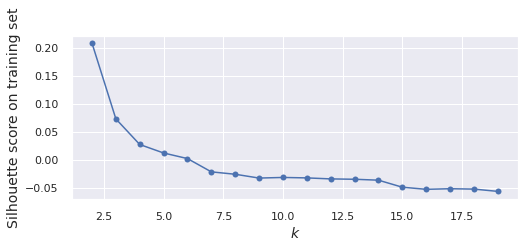

In [36]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score on training set", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7]) # [xmin, xmax, ymin, ymax]
#save_fig("silhouette_score_vs_k_plot")
plt.show()

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores_nltk, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score of KMeans NLTK (with cosine distance) on training set", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7]) # [xmin, xmax, ymin, ymax]
#save_fig("silhouette_score_vs_k_plot")
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(range(2, 50), silhouette_scores_test, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score on test set", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7]) # [xmin, xmax, ymin, ymax]
#save_fig("silhouette_score_vs_k_plot")
plt.show()

# Compare 1 document to closest neighbours

In [61]:
df_train_ori

,index,Body,Title,Tags,all_text,Tags_.htaccess,Tags_.net,Tags_.net-core,Tags_ajax,Tags_algorithm,Tags_amazon-dynamodb,Tags_amazon-ec2,Tags_amazon-s3,Tags_amazon-web-services,Tags_anaconda,Tags_android,Tags_android-fragments,Tags_android-layout,Tags_android-recyclerview,Tags_android-studio,Tags_angular,Tags_angular-material,Tags_angular8,Tags_angular9,Tags_angularjs,Tags_animation,Tags_ansible,Tags_apache,Tags_apache-kafka,Tags_apache-spark,Tags_apache-spark-sql,Tags_api,Tags_arduino,Tags_arraylist,Tags_arrays,Tags_asp.net,Tags_asp.net-core,Tags_asp.net-mvc,Tags_asp.net-web-api,Tags_assembly,Tags_async-await,Tags_asynchronous,Tags_audio,Tags_authentication,Tags_automation,Tags_awk,Tags_aws-lambda,Tags_axios,Tags_azure,Tags_azure-active-directory,Tags_azure-devops,Tags_azure-functions,Tags_azure-pipelines,Tags_bash,Tags_batch-file,Tags_beautifulsoup,Tags_blazor,Tags_bootstrap-4,Tags_bots,Tags_button,Tags_c,Tags_c#,Tags_c++,Tags_c++11,Tags_caching,Tags_canvas,Tags_charts,Tags_class,Tags_cmake,Tags_cmd,Tags_codeigniter,Tags_computer-vision,Tags_cookies,Tags_cors,Tags_css,Tags_csv,Tags_curl,Tags_d3.js,Tags_dart,Tags_data-science,Tags_data-structures,Tags_database,Tags_dataframe,Tags_date,Tags_datetime,Tags_debugging,Tags_deep-learning,Tags_deployment,Tags_dictionary,Tags_discord,Tags_discord.js,Tags_discord.py,Tags_django,Tags_django-forms,Tags_django-models,Tags_django-rest-framework,Tags_django-templates,Tags_django-views,Tags_docker,Tags_docker-compose,Tags_dockerfile,Tags_dom,Tags_dplyr,Tags_eclipse,Tags_ecmascript-6,Tags_elasticsearch,Tags_electron,Tags_eloquent,Tags_email,Tags_encryption,Tags_entity-framework,Tags_entity-framework-core,Tags_error-handling,Tags_events,Tags_excel,Tags_excel-formula,Tags_exception,Tags_expo,Tags_express,Tags_facebook,Tags_fetch,Tags_ffmpeg,Tags_file,Tags_filter,Tags_firebase,Tags_firebase-authentication,Tags_firebase-cloud-messaging,Tags_firebase-realtime-database,Tags_firefox,Tags_flask,Tags_flexbox,Tags_flutter,Tags_flutter-layout,Tags_for-loop,Tags_forms,Tags_frontend,Tags_function,Tags_gcc,Tags_generics,Tags_ggplot2,Tags_git,Tags_github,Tags_gitlab,Tags_go,Tags_google-apps-script,Tags_google-bigquery,Tags_google-chrome,Tags_google-chrome-extension,Tags_google-cloud-firestore,Tags_google-cloud-functions,Tags_google-cloud-platform,Tags_google-colaboratory,Tags_google-maps,Tags_google-sheets,Tags_gradle,Tags_graph,Tags_graphql,Tags_group-by,Tags_hadoop,Tags_haskell,Tags_heroku,Tags_hibernate,Tags_html,Tags_http,Tags_https,Tags_if-statement,Tags_iframe,Tags_iis,Tags_image,Tags_image-processing,Tags_import,Tags_indexing,Tags_inheritance,Tags_input,Tags_intellij-idea,Tags_ionic-framework,Tags_ios,Tags_java,Tags_java-8,Tags_javafx,Tags_javascript,Tags_jenkins,Tags_jenkins-pipeline,Tags_jestjs,Tags_join,Tags_jpa,Tags_jquery,Tags_json,Tags_junit,Tags_jupyter-notebook,Tags_jwt,Tags_keras,Tags_kivy,Tags_kotlin,Tags_kubernetes,Tags_lambda,Tags_laravel,Tags_laravel-5,Tags_laravel-7,Tags_linked-list,Tags_linq,Tags_linux,Tags_list,Tags_logging,Tags_loops,Tags_machine-learning,Tags_macos,Tags_material-ui,Tags_math,Tags_matlab,Tags_matplotlib,Tags_matrix,Tags_maven,Tags_memory,Tags_merge,Tags_methods,Tags_microsoft-graph,Tags_mobile,Tags_model-view-controller,Tags_module,Tags_mongodb,Tags_mongodb-query,Tags_mongoose,Tags_ms-access,Tags_multidimensional-array,Tags_multiprocessing,Tags_multithreading,Tags_mvvm,Tags_mysql,Tags_networking,Tags_neural-network,Tags_next.js,Tags_nginx,Tags_nlp,Tags_node.js,Tags_npm,Tags_numpy,Tags_nuxt.js,Tags_oauth-2.0,Tags_object,Tags_objective-c,Tags_oop,Tags_opencv,Tags_opengl,Tags_optimization,Tags_oracle,Tags_pandas,Tags_pandas-groupby,Tags_parsing,Tags_pdf,Tags_performance,Tags_perl,Tags_php,Tags_pip,Tags_plot,Tags_plotly,Tags_pointers,Tags_post,Tags_postgresql,Tags_postman,Tags_powerbi,Tags_powershell,Tags_promise,Tags_pycharm,Tags_pygame,Tags_pyqt5,Tags_pyspark,Tags_python,Tags_python-2.7,Tags_python-3.x,Tags_python-requests,Tags_pytorch,Tags_qt,Tags_r,Tags_random,Tags_ras

In [63]:
df_train.shape

(269928, 200)

In [64]:
df_train_ori.shape

(134390, 387)

In [49]:
doc_to_compare = df_train_ori.loc[500]['Body']

In [50]:
gensim.utils.simple_preprocess(remove_stopwords(doc_to_compare))

['need',
 'help',
 'formatting',
 'footer',
 'website',
 'new',
 'css',
 'figure',
 'text',
 'copyright',
 'sit',
 'underneath',
 'icons',
 'tried',
 'tweaking',
 'altering',
 'height',
 'footer',
 'best',
 'text',
 'left',
 'right',
 'icons',
 'any',
 'help',
 'appreciated',
 'css',
 'style',
 'sheet',
 'body',
 'margin',
 'logo',
 'display',
 'block',
 'margin',
 'left',
 'auto',
 'margin',
 'right',
 'auto',
 'width',
 'px',
 'height',
 'px',
 'margin',
 'top',
 'px',
 'navbar',
 'display',
 'flex',
 'justify',
 'content',
 'center',
 'overflow',
 'hidden',
 'background',
 'color',
 'white',
 'position',
 'fixed',
 'top',
 'width',
 'margin',
 'top',
 'px',
 'text',
 'align',
 'center',
 'navbar',
 'display',
 'inline',
 'block',
 'width',
 'color',
 'black',
 'text',
 'align',
 'center',
 'padding',
 'px',
 'px',
 'text',
 'decoration',
 'none',
 'font',
 'size',
 'px',
 'font',
 'family',
 'poppins',
 'body',
 'services',
 'services',
 'body',
 'ourstory',
 'ourstory',
 'border',


In [51]:
print(doc_to_compare)

I need help formatting the footer for my website. I am new to CSS and I cannot figure out how to get the text for the Copyright to sit underneath of the icons. I tried tweaking by altering the height of the footer and the best I can get is the text to the left or right of the icons. Any help would be appreciated.
CSS Style Sheet: 
body {
    margin: 0;
}

.logo {
    display: block;
    margin-left: auto;
    margin-right: auto;
    width: 50px;
    height: 50px;
    margin-top: 11px;
}

.navBar {
    display: flex;
    justify-content: center;
    overflow: hidden;
    background-color: white;
    position: fixed;
    top: 0;
    width: 100%;
    margin-top: 61px;
    text-align: center;
}

.navBar a {
    display: inline-block;
    width: 10%;
    color: black;
    text-align: center;
    padding: 7px 7px;
    text-decoration: none;
    font-size: 17px;
    font-family: "Poppins";
}

body.services a.services,
body.ourstory a.ourstory {
    border-bottom: 1.5px solid black;
}

.header

In [52]:
doc2vec.model.infer_vector(gensim.utils.simple_preprocess(remove_stopwords(doc_to_compare)))


array([-0.49704692, -0.02920709,  0.5187152 , -0.11004071, -0.2917824 ,
       -0.25120512, -0.01416555, -0.27174464,  0.04586318,  0.49005437,
        0.12406445,  0.27921417,  0.05562257,  0.20519675, -0.3986729 ,
        0.01599476, -0.02703137, -0.05693385, -0.09141451,  0.23509397,
       -0.10647678,  0.38899675, -0.14542155, -0.04296934, -0.11794857,
        0.13600966,  0.70877075, -0.04689693, -0.16446772, -0.4686794 ,
        0.3964592 ,  0.1435595 ,  0.00272331, -0.49355263,  0.08073934,
        0.11527123,  0.3748703 , -0.06417033,  0.1812717 , -0.04480935,
        0.29898405, -0.30941474, -0.1887769 ,  0.17934325, -0.02778222,
        0.01661648,  0.2270857 , -0.10328931, -0.20246337,  0.0367703 ,
        0.19017763,  0.16475812, -0.11788943,  0.01138798, -0.135519  ,
       -0.37775177,  0.30359197, -0.41529793,  0.32371664,  0.07415662,
        0.2321604 ,  0.405023  ,  0.04984728, -0.18975276, -0.11026897,
       -0.49077109, -0.05149264, -0.2787291 , -0.23260945, -0.34

In [56]:
doc2vec.model.docvecs.most_similar([doc2vec.model.infer_vector(gensim.utils.simple_preprocess(remove_stopwords(doc_to_compare)))])

[(122788, 0.5498380661010742),
 (269664, 0.5213683843612671),
 (4628, 0.5204919576644897),
 (198289, 0.5196502208709717),
 (266450, 0.513439416885376),
 (251266, 0.5133167505264282),
 (188112, 0.5120235681533813),
 (238236, 0.511515736579895),
 (55327, 0.507951021194458),
 (219697, 0.5056238174438477)]

In [60]:
print(df_train_ori.loc[266450]['Body'])

KeyError: 266450

# First implementation of a KNN classification algorithm

In [68]:
importlib.reload(sys.modules['functions'])
from functions import *

In [69]:
df_train = df_train_ori
df_test = df_test_ori

In [70]:
preparation_pipeline = Pipeline([
    ('scaler', StandardScalerMultiple(features_toscale=['TotalPricePerMonth'])),
    
    
    # Faire la réduction dimensionnelle à part pour les bag of words et pour les autres features
   
    #('minmaxscaler', MinMaxScalerMultiple(features_toscale=['TotalPricePerMonth'])),
    ('features_selector', FeaturesSelector(features_toselect=['DescriptionNormalized'])),
    ('dimensionality_reductor', DimensionalityReductor(features_totransform=['DescriptionNormalized'], \
                                                        algorithm_to_use='TSNE', n_dim=3)),
    ('minmaxscaler_final', MinMaxScalerMultiple(features_toscale='ALL_FEATURES')),
])

In [71]:
df_train = preparation_pipeline.fit_transform(df_train)

No fit for TSNE


In [72]:
df_test = preparation_pipeline.transform(df_test)

# Annex (old code)

## Remove html tags in Body, and regroup Body + title

In [82]:
dataprep = PrepareTextData()

In [83]:
df = dataprep.fit_transform(df)

## Or with beautifulsoup
df.loc[:, 'Body'] = df['Body'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [93]:
pd.set_option('display.max_colwidth', None)
print(df.loc[45000]['all_text'])

How to get the name of the current file, module, and procedure in Chapel. In Chapel, is it possible to get the name of the current file, module, or procedure by some means (e.g., via a helper function)? My goal here is to print the routine name without writing it explicitly by hand in writeln().
proc calculate_this_and_that_ver2() {
  // writeln( "In calculate_this_and_that_ver2()" ); // long...
  writeln( "In ", modname(), " : ", procname() );
  ...
}

What I wish here may be similar to something like #function etc in Swift:
func mytest() {
   print( "file =", #file, "func =", #function, "line =", #line )
}
mytest()  // --> file = test.swift func = mytest() line = 2




In [10]:
# Converting tags from <tag 1><tag2><tag3> to tag1 tag2 tag3
df.loc[:, 'Tags'] = df['Tags'].str.replace('<', '') 
df.loc[:, 'Tags'] = df.loc[:, 'Tags'].str.replace('>', ' ') 
df.loc[:, 'Tags'] = df.loc[:, 'Tags'].str.rstrip()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149323 entries, 0 to 299998
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Body    149323 non-null  object
 1   Title   149323 non-null  object
 2   Tags    149323 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [12]:
df.sample(100)

,Body,Title,Tags
193620,require(mlbench)\nrequire(e1071)\nrequire (car...,weight in extend caret random forest,r random-forest r-caret hyperparameters
127572,IntelliJ Idea 2020.1 shows this error for matH...,IntelliJ IDEA shows error for matHeaderRowDef,angular intellij-idea angular-material angular...
262111,"Need some Help With Typescript, React and Redu...","Typescript, React and Redux axios Error - acti...",javascript reactjs typescript redux
6013,I have a dataframe in which one column has tex...,How to add new Dataframe Column with Dictionar...,python pandas dictionary
45303,"I am trying to install RQDA to my RStudio, but...","Rstudio (RQDA error), gWidgetsRGtk2 cannot be ...",rstudio gwidgets rqda
207996,I have an issue where I cannot encode values t...,How to convert to Hungarian on Python,python encoding character-encoding
229763,I can not understand why this is not working i...,Simple Loop in python3 shell (version 3.81) Sy...,python-3.x
286484,I am working on finetunning a ResNet50 Net tha...,"Why using Softmax in a ""Finetunning Multioutpu...",keras deep-learning computer-vision resnet fin...
85208,System just updated to Transmission 3.0. Thin...,Transmission 3.0 update (Ubuntu 16.04) - using...,ubuntu-16.04 transmission-daemon
21227,I'm new to Dart 2. I want a class to have a pr...,What is an equivalent for Dart 2 to `typeof` o...,dart dart-2


## Regroup text features and clean

df.loc[:, 'Title'].fillna(value='', inplace=True)

df['all_text'] = df['Title'].astype(str) + '. ' +  df['Body'].astype(str)

## Split training set, test set (old)

In [104]:
df, df_train, df_test = custom_train_test_split_sample(df, None)

In [105]:
df_train.reset_index(drop=True, inplace=True)

In [106]:
df_train

,Body,Title,Tags
0,"<p>Here is my code:</p>\n\n<pre><code> def ping_host(self, hostname, ping_cmd='/usr/bin/ping', count=1, timeout=400):\n cmd = [ping_cmd, '-c%s' % count, '-W%s' % timeout, hostname]\n (output, error) = subprocess.Popen(cmd,\n stdout=subprocess.PIPE,\n stderr=subprocess.PIPE,\n shell=True).communicate()\n print ' '.join( cmd )\n print output, error\n</code></pre>\n\n<p>When I run it I get this output:</p>\n\n<pre><code>/usr/bin/ping -c1 -W400 tools-dev1.example.com\n Usage: ping [-aAbBdDfhLnOqrRUvV64] [-c count] [-i interval] [-I interface]\n [-m mark] [-M pmtudisc_option] [-l preload] [-p pattern] [-Q tos]\n [-s packetsize] [-S sndbuf] [-t ttl] [-T timestamp_option]\n [-w deadline] [-W timeout] [hop1 ...] destination\nUsage: ping -6 [-aAbBdDfhLnOqrRUvV] [-c count] [-i interval] [-I interface]\n [-l preload] [-m mark] [-M pmtudisc_option]\n [-N nodeinfo_option] [-p pattern] [-Q tclass] [-s packetsize]\n [-S sndbuf] [-t ttl] [-T timestamp_option] [-w deadline]\n [-W timeout] destination\n</code></pre>\n\n<p>I assume I am doing something wrong with the first argument, <code>cmd</code>, I am passing to <code>Popen()</code>, but I don't know what. If I cut-n-paste <code>/usr/bin/ping -c1 -W400 tools-dev1.example.com</code> to a command line it works fine.</p>\n",why is my ping command getting a usage error?,<python>
1,"<p>Gradle sync failed when the firebase cloud messaging dependency was applied.</p>\n\n<p>I've tried all the versions of FCM in app like 17.0.0, 17.3.2, 15.0.0, 16.0.1, etc. </p>\n\n<p><img src=""https://i.stack.imgur.com/NlK4f.png"" alt=""enter image description here""></p>\n\n<p><img src=""https://i.stack.imgur.com/a8A7F.png"" alt=""enter image description here""></p>\n\n<p><img src=""https://i.stack.imgur.com/XSQOh.png"" alt=""enter image description here""></p>\n","Gradle project sync failed. Basic functionality (e.g. editing, deugging ) will not work properly",<java><android><gradle><android-studio-3.2>
2,"<p>I have a panda dataframe with many rows, I am using multiprocessing to process grouped tables from this dataframe concurrently. It works fine but I have a problem passing in a second parameter, I have tried to pass both arguments as a Tuple but it doesn't work. My code is as follows:</p>\n\n<p>I want to also pass in the parameter ""col"" to the function ""process_table""</p>\n\n<pre><code>for col in cols:\n tables = df.groupby('test')\n p = Pool()\n lines = p.map(process_table, table)\n p.close()\n p.join()\n\ndef process_table(t):\n # Bunch of processing to create a line for matplotlib\n return line\n</code></pre>\n",Passing second argument to function in pool.map,<python><python-2.7><arguments><multiprocessing><python-multiprocessing>
3,"<p>I am doing a file upload page , that will rename the file before adding it , and i am getting those errors.\nI've tried <code>chmod -R 777 ./</code> in the folder of the website but it still doesn't work.</p>\n\n<pre><code> $dir = Users::currentUser()-&gt;id;//each user have his folder\nif(move_uploaded_file($_FILES[""file""][""tmp_name""], PROOT . 'files' . DS . $dir . DS))\n {\n echo ""The file has been uploaded as "".$ran2.$ext;\n //Router::redirect('upload');\n }\n else\n {\n echo ""Sorry, there was a problem uploading your file."";\n }\n</code></pre>\n\n<p>The <code>PROOT</code> is defined by me as the website root folder <code>define('PROOT','/framework/');</code> and the <code>DS</code> is the separator <code>(strtoupper(substr(PHP_OS, 0, 3)) === 'WIN') ? define('DS', '/') : define('DS', DIRECTORY_SEPARATOR);</code>.</p>\n\n<p>And this is how the error looks</p>\n\n<pre><code>Warning: move_uploaded_file(/framework/files/4/): failed to open stream: No such file or directory in /opt/lampp/htdocs/framework/app/controllers/UploadController.php on line 46\n\n\nWarning: move_uploaded_file(): Unable to move '/opt/lampp/temp/phpHz70FG' to '/framework/files/4/' in /opt/lampp/htdocs/framework/app/controllers/UploadController.php on line 46\n</code></pre

In [107]:
df_test

,Body,Title,Tags
141549,"<p>I am unable to figure out how to get to my landing page while running <code>node --inspect app.js</code>? For example, when I run it locally I would normally go to localhost:3000.</p>\n\n<p>It is not exactly clear to me how to get both going. My output with node is as follows: </p>\n\n<pre><code>C:\Users\user\Desktop\app&gt;node --inspect app.js\nDebugger listening on ws://127.0.0.1:9229/1e900a59-bd94-486c-9eee-\nd3be90717377\nFor help, see: https://nodejs.org/en/docs/inspector\n// more output\n</code></pre>\n\n<p>After I get the Devtools running using NiM, where do I go from there? </p>\n\n<p>Thank you,</p>\n",How to load website and debug node application?,<node.js><debugging><google-chrome-devtools>
227939,"<p>Authenticate is okay when the user info is correct but upon entering wrong details the server crashes </p>\n\n<pre><code>passport.use(new LocalStrategy({\n usernameField: 'password',\n passportField: 'username'\n},\n function(username, password, done) {\n con.query(""SELECT * FROM uids WHERE list ="" +""'"" + username + ""'"", function (err, result) {\n if (err) done(err);\n var clean = JSON.parse(JSON.stringify(result))[0].list //Expected Result : test2\n //from [ RowDataPacket { list: 'test2' } ]\n\n //no user was found\n\n if(username === clean) {\n //Success\n return done(null, true);\n } else {\n //Wrong password\n return done(null, false);\n }\n });\n }\n ));\n</code></pre>\n\n<p>Error From server:</p>\n\n<pre><code> throw err; // Rethrow non-MySQL errors\n ^\n\nTypeError: Cannot read property 'list' of undefined\n</code></pre>\n\n<p>I understand what is wrong but i dont know if there is a function to check if the list even exists </p>\n\n<pre><code>var mysql = require('mysql');\n\nvar con = mysql.createConnection({\n host: ""localhost"",\n user: ""dawg111"",\n password: ""poopingboy111"",\n database: ""mydb""\n});\n\ncon.connect(function(err) {\n if (err) throw err;\n console.log(""Connection to Database is ok!"");\n});\n\nconst LocalStrategy = require('passport-local').Strategy;\npassport.use(new LocalStrategy({\n usernameField: 'username',\n passportField: 'password'\n},\n function(username, password, done) {\n con.query('SELECT * FROM uids WHERE list = ?', [username], function (error, results, fields) {\n if (error) throw error;\n console.log(results);\n });\n }\n ));\n</code></pre>\n",How to fix unwanted exceptions from JSON.parse() commands,<javascript><mysql><node.js><passport.js>
263961,"<pre><code>dict = {'a':['b1','b2', 'b3'], 'b':['b1','b2','b3'], 'c':['b1','b3','b4','b5']}\ntoList = list(dict.values())\nos.path.commonprefix(toList)\n</code></pre>\n\n<p>os.path.commonprefix(toList) prints just ['b1'] but I'm trying to find the longest common prefix amongst any of the list of lists inputted, so ['b1', 'b2'] here. Another example:</p>\n\n<p>[a,b,c],[a,c,c],[a,b] -> [a,b]</p>\n\n<p>[a,c,d],[a,b,c],[a,d] -> [a]</p>\n\n<hr>\n\n<p>*EDITED ORIGINAL QUESTION - realized os.path.commonprefix(toList) doesn't return any existing common prefix (like in my example), but the common prefix of all given lists inputted. Is there a library that does do what I want in my example?</p>\n",Library like os.path.commonprefix but returns common prefix of any 2+ inputted lists?,<python><prefix><os.path>
199225,"<p>Suppose I randomly generate a list. </p>\n\n<pre><code>mylist = []\nfor i in range(0,10):\n s = np.random.choice([-1,0,1])\n mylist.append(s)\n</code></pre>\n\n<p>Now <code>for x in range(0,100)</code>. I modify the elements according to some rules, and then count the number of elements of each type, using <code>counts = Counter(mylist)</code></p>\n\n<pre><code>for x in range(0,100):\n #some rules\n counts = Counter[mylist]\n</code></pre>\n\n<p>In the beginning the list can be in a state when say the number of -1 is greater than the number of +1's, and then transition from state where the number of +1's is greater than the number of -1's. </p>\n\n<p>Is there way to count the number of times

In [108]:
df_test.reset_index(drop=True, inplace=True)

df['all_text']